In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import interpolate
from scipy import stats

### GA_AS

In [4]:
no_filter = pd.read_csv("no_filter_GA_AS.csv")
filter = pd.read_csv("filter_GA_AS.csv")

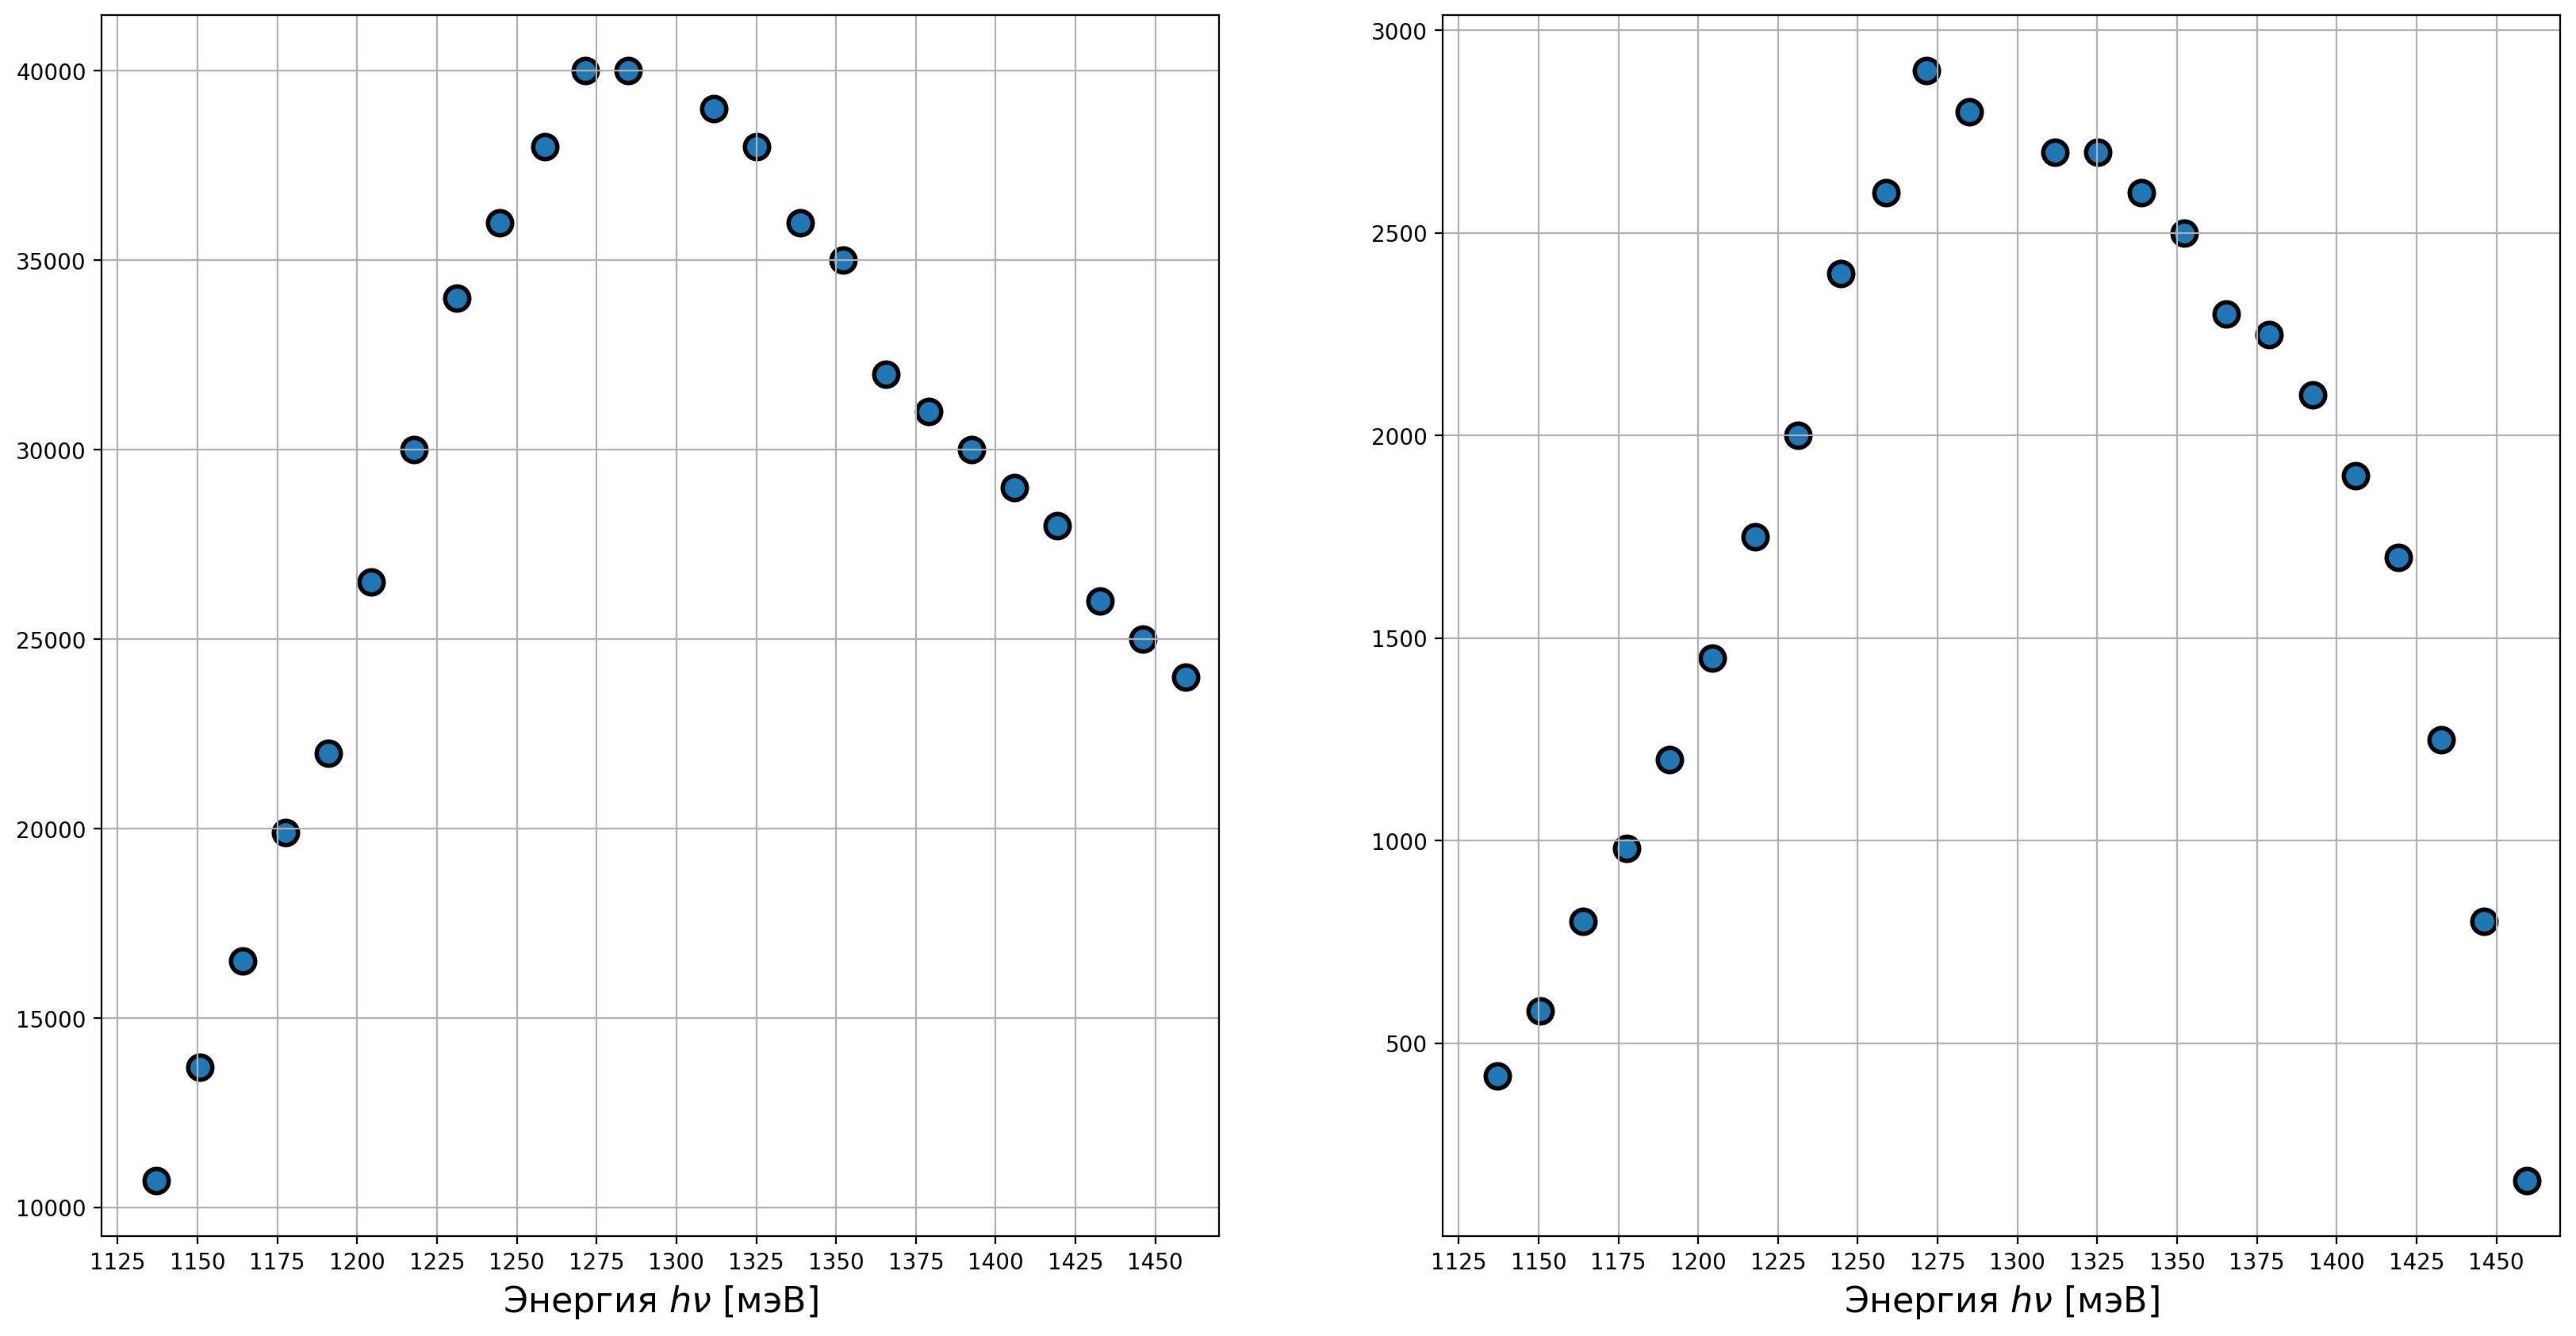

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10), dpi = 200)
ax[0].scatter(no_filter.energy - 130, no_filter.photo, s = 120, edgecolors = 'black', linewidth = 2)
ax[1].scatter(filter.energy - 130, filter.photo, s = 120, edgecolors = 'black', linewidth = 2)


for a in ax:
    a.grid()
    a.set_xticks(np.arange(1000, 2000, 25))
    a.set_xlim(1250 - 130, 1600 - 130)
    a.set_xlabel(r"Энергия $h \nu$ [мэВ]", fontsize = 16)

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_180126/1344181323.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\propto \ln (1 / T)$", fontsize = 16)


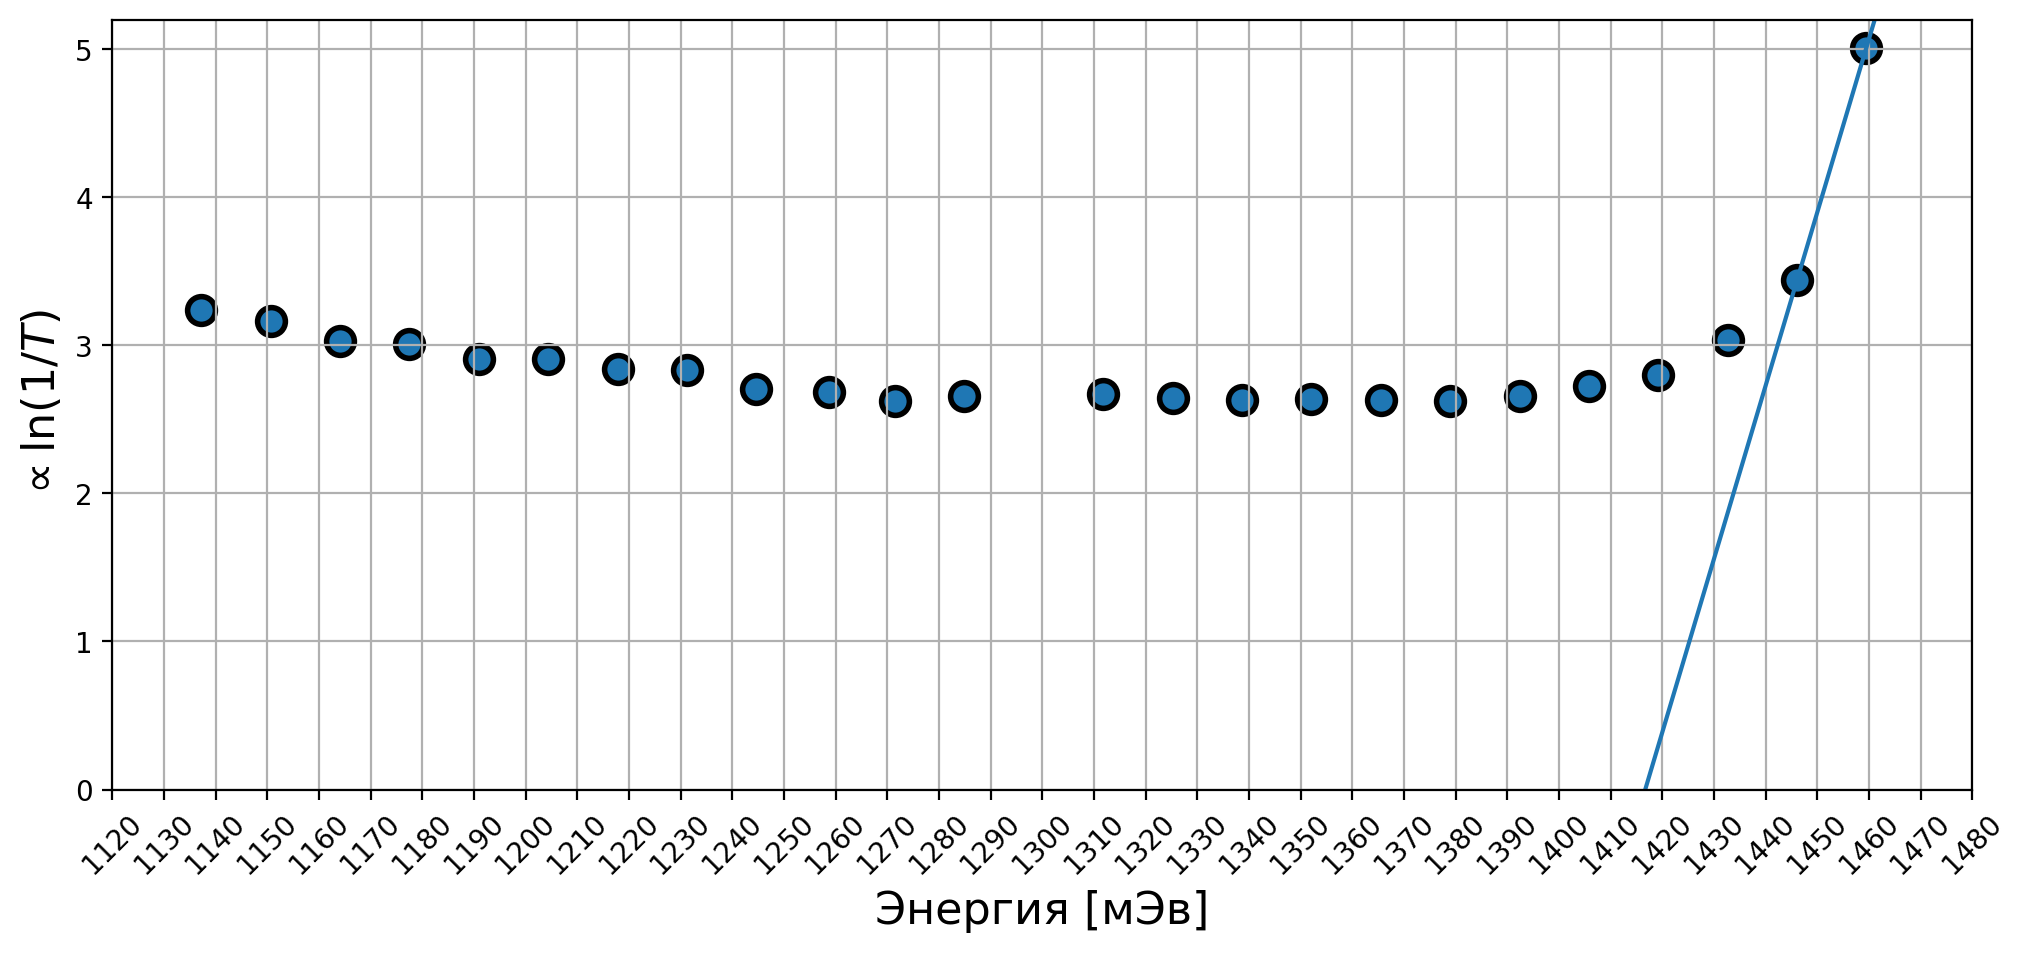

In [18]:
T = filter.photo / no_filter.photo
R = 0
ln_photo = np.log(np.power(1 - R, 2) / T)
plt.figure(figsize = (12, 5), dpi = 200)
shift = 130
e = no_filter.energy - shift
mask = e > 1570 - shift
MNK = stats.linregress(e[mask], ln_photo[mask])
x_line = np.linspace(400, 2000)
y_line = MNK.slope * x_line + MNK.intercept
plt.scatter(e, ln_photo, s = 100, edgecolors='black', linewidths=2)
plt.plot(x_line, y_line)
plt.ylim(0, 5.2)
plt.xticks(np.arange(1000, 2000, 10), rotation = 45)
plt.xlim(1250 - 130, 1480)
plt.xlabel("Энергия [мЭв]", fontsize = 16)
plt.ylabel("$\propto \ln (1 / T)$", fontsize = 16)
plt.grid()